<a href="https://colab.research.google.com/github/psukphranee/Machine-Learning-Projects/blob/master/Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Fashion MNIST

Fashion MNIST. MNIST analog for neural networks. Instead of handwritten digits, we have grayscale images of fashion articles. The data are 28x28 pixel intensities ranging from 0 to 255 (ie 8 bits). Labels are integer entries 0-9 given by the table:

0.	T-shirt/top
1.	Trouser
2.	Pullover
3.	Dress
4.	Coat
5.	Sandal
6.	Shirt
7.	Sneaker
8.	Bag
9.	Ankle boot

In [17]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import matplotlib.pyplot as plt

In [18]:
(x_train, y_train), (x_test, y_test) = keras.datasets.fashion_mnist.load_data();
assert x_train.shape == (60000, 28, 28)
assert x_test.shape == (10000, 28, 28)
assert y_train.shape == (60000,)
assert y_test.shape == (10000,)

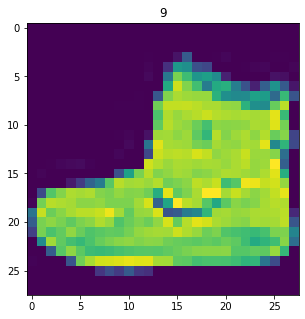

In [19]:
plt.figure(figsize=(5,5))
plt.imshow(x_train[0])
plt.title(y_train[0])
plt.show()

The data are already split into training and testing sets. We'll take the first 5000 samples from the training set to be the validation set. We also normalize the features since we are using SGD to optimize. 

In [20]:
x_train = x_train/255.0
x_valid, x_train = x_train[:5000], x_train[5000:]
y_valid, y_train = y_train[:5000], y_train[5000:]

In [21]:
#Build model

model = keras.models.Sequential(
    [
     keras.layers.Flatten(input_shape=[28,28]),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(300, activation='relu'),
     keras.layers.Dense(10, activation='softmax')
    ]
)

In [22]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 784)               0         
                                                                 
 dense_3 (Dense)             (None, 300)               235500    
                                                                 
 dense_4 (Dense)             (None, 300)               90300     
                                                                 
 dense_5 (Dense)             (None, 10)                3010      
                                                                 
Total params: 328,810
Trainable params: 328,810
Non-trainable params: 0
_________________________________________________________________


In [23]:
hidden1 = model.layers[1]
hidden1

In [24]:
h1_weights = hidden1.get_weights()

In [25]:
len(h1_weights)

2

In [26]:
h1_weights[0].shape

(784, 300)

In [27]:
h1_weights[1].shape

(300,)

In [28]:
#Compile model 

model.compile(
    loss="sparse_categorical_crossentropy",
    optimizer="SGD",
    metrics=["accuracy"]
)

In [29]:
history = model.fit(
    x=x_train,
    y=y_train,
  validation_data=(x_valid, y_valid),
  epochs=30
)

Epoch 1/30
1719/1719 [==============================] - 12s 7ms/step - loss: 0.7307 - accuracy: 0.7580 - val_loss: 0.5460 - val_accuracy: 0.8128
Epoch 2/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4967 - accuracy: 0.8267 - val_loss: 0.4636 - val_accuracy: 0.8406
Epoch 3/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4480 - accuracy: 0.8431 - val_loss: 0.4359 - val_accuracy: 0.8480
Epoch 4/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.4181 - accuracy: 0.8526 - val_loss: 0.4296 - val_accuracy: 0.8492
Epoch 5/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3981 - accuracy: 0.8610 - val_loss: 0.3819 - val_accuracy: 0.8718
Epoch 6/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3828 - accuracy: 0.8639 - val_loss: 0.3798 - val_accuracy: 0.8640
Epoch 7/30
1719/1719 [==============================] - 8s 5ms/step - loss: 0.3691 - accuracy: 0.8693 - val_loss: 0.3641 - val_accuracy

In [30]:
history

In [33]:
history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

In [39]:
history_pd = pd.DataFrame(history.history)

In [40]:
history_pd.head()

,loss,accuracy,val_loss,val_accuracy
0,0.730653,0.757964,0.545986,0.8128
1,0.496656,0.826691,0.463572,0.8406
2,0.447961,0.843109,0.435933,0.8480
3,0.418118,0.852636,0.429612,0.8492
4,0.398051,0.860964,0.381949,0.8718


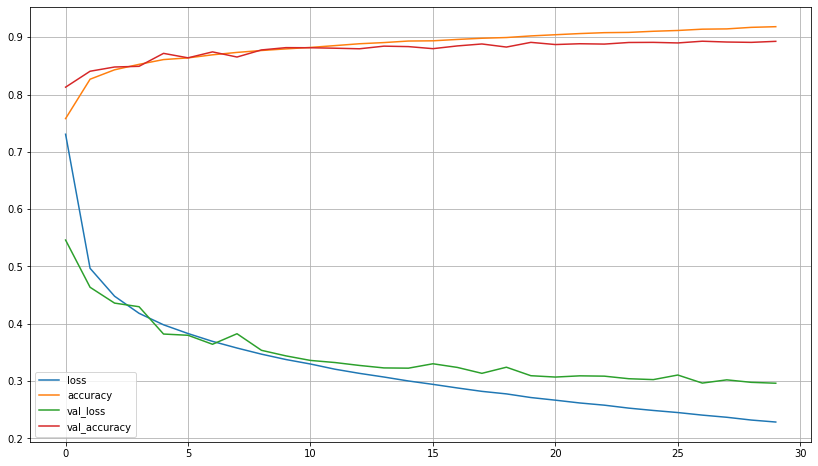

In [48]:
history_pd.plot(figsize=(14,8))
plt.grid()
plt.show()

In [49]:
predictions = model.predict(x_train)

In [54]:
predictions_pd = pd.DataFrame(predictions)

In [57]:
predictions_pd.head()

,0,1,2,3,4,5,6,7,8,9
0,1.640365e-05,9.551047e-07,1.813976e-01,2.293696e-06,7.752162e-01,8.939261e-08,4.335581e-02,3.813195e-11,1.067206e-05,1.331603e-11
1,9.293510e-01,1.034663e-06,1.007527e-03,1.368117e-05,1.703088e-06,4.221398e-08,6.962293e-02,4.252056e-08,2.086804e-06,9.742875e-09
2,3.732049e-05,5.722103e-06,5.209404e-06,3.778260e-07,2.777761e-07,1.924180e-03,1.539486e-05,8.984478e-01,8.023570e-04,9.876128e-02
3,1.232958e-09,3.156603e-10,5.743264e-11,5.970360e-12,1.657916e-11,7.296333e-06,6.925426e-11,2.885727e-04,3.323867e-09,9.997041e-01
4,6.387712e-07,2.170523e-07,4.501885e-08,6.905366e-09,9.844601e-08,6.306340e-04,2.824174e-07,4.021912e-03,9.251606e-06,9.953369e-01


In [58]:
predictions_classes = model.predict_classes(x_train)

AttributeError: ignored